In [13]:
from src.trainers import compile_and_fit_with_pinball_loss
from src.loaders.window_generator import WindowGenerator
from src.loaders.data_loader import load_basic_preprocessed_train, load_submission_data
from src.make_submissions.load_test_features import make_submission_df, to_submission_csv

In [14]:
from src.loaders.data_loader import load_train_data
from src.preprocessors.preprocessors import split_train_valid_test

train_df, valid_df, test_df = split_train_valid_test(load_train_data(), [0.7, 0.2, 0.1])


ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 9), (10511, 9), (5257, 9)


In [15]:
train_df_target = train_df["TARGET"]
valid_df_target = valid_df["TARGET"]
test_df_target = test_df["TARGET"]

In [16]:
train_df, valid_df, test_df = load_basic_preprocessed_train()

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)


In [17]:
train_df["scaled_TARGET"] = train_df["TARGET"]
valid_df["scaled_TARGET"] = valid_df["TARGET"]
test_df["scaled_TARGET"] = test_df["TARGET"]

train_df["TARGET"] = train_df_target
valid_df["TARGET"] = valid_df_target
test_df["TARGET"] = test_df_target

In [18]:
train_df

,DHI,DNI,WS,RH,T,TARGET,Day_sin,Day_cos,Hour_sin,Hour_cos,GHI,DHI_min_max_scaled,DNI_min_max_scaled,GHI_min_max_scaled,WS_min_max_scaled,RH_min_max_scaled,T_min_max_scaled,scaled_TARGET
0,-0.614791,-0.665264,-0.652078,0.523656,-1.983543,0.000000,-0.020308,1.329597,-0.000584,1.414117,-0.755529,-0.614791,-0.665264,-0.755529,-0.652078,0.523656,-1.983543,-0.685276
1,-0.614791,-0.665264,-0.652078,0.522735,-1.983543,0.000000,-0.020308,1.329597,-0.000584,1.414117,-0.755529,-0.614791,-0.665264,-0.755529,-0.652078,0.522735,-1.983543,-0.685276
2,-0.614791,-0.665264,-0.580885,0.647993,-1.983543,0.000000,-0.020308,1.329597,0.365437,1.365930,-0.755529,-0.614791,-0.665264,-0.755529,-0.580885,0.647993,-1.983543,-0.685276
3,-0.614791,-0.665264,-0.580885,0.646611,-1.983543,0.000000,-0.020308,1.329597,0.365437,1.365930,-0.755529,-0.614791,-0.665264,-0.755529,-0.580885,0.646611,-1.983543,-0.685276
4,-0.614791,-0.665264,-0.580885,0.805485,-1.983543,0.000000,-0.020308,1.329597,0.706513,1.224651,-0.755529,-0.614791,-0.665264,-0.755529,-0.580885,0.805485,-1.983543,-0.685276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36787,-0.029736,1.862045,2.124474,-0.759309,-0.254832,37.912042,0.816634,1.070792,0.999403,-1.000063,1.656074,-0.029736,1.862045,1.656074,2.124474,-0.759309,-0.254832,0.804417
36788,-0.010234,1.996416,2.622830,-0.834371,-0.158792,44.949675,0.816634,1.070792,0.706513,-1.224805,1.781253,-0.010234,1.996416,1.781253,2.622830,-0.834371,-0.158792,1.080949
36789,0.067773,1.944955,2.622830,-0.834832,-0.158792,49.078664,0.816634,1.070792,0.706513,-1.224805,1.755706,0.067773,1.944955,1.755706,2.622830,-0.834832,-0.158792,1.243191
36790,0.028769,2.127928,2.622830,-0.902066,-0.062753,55.083861,0.816634,1.070792,0.365437,-1.366084,1.908986,0.028769,2.127928,1.908986,2.622830,-0.902066,-0.062753,1.479156


In [19]:
cutter = ["DHI", "DNI", "GHI", "DHI_min_max_scaled", "DNI_min_max_scaled", "GHI_min_max_scaled", "scaled_TARGET", "TARGET",]
train_df = train_df[cutter]
valid_df = valid_df[cutter]
test_df = test_df[cutter]

In [20]:
train_df

,DHI,DNI,GHI,DHI_min_max_scaled,DNI_min_max_scaled,GHI_min_max_scaled,scaled_TARGET,TARGET
0,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
1,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
2,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
3,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
4,-0.614791,-0.665264,-0.755529,-0.614791,-0.665264,-0.755529,-0.685276,0.000000
...,...,...,...,...,...,...,...,...
36787,-0.029736,1.862045,1.656074,-0.029736,1.862045,1.656074,0.804417,37.912042
36788,-0.010234,1.996416,1.781253,-0.010234,1.996416,1.781253,1.080949,44.949675
36789,0.067773,1.944955,1.755706,0.067773,1.944955,1.755706,1.243191,49.078664
36790,0.028769,2.127928,1.908986,0.028769,2.127928,1.908986,1.479156,55.083861


In [21]:
TAU = 0.5
ONE_DAY_STEPS = 48
OUTPUT_STEPS = ONE_DAY_STEPS * 2

In [23]:
predict_np.shape

(81, 48, 7)

In [29]:
submission_df["q_0.1"] = conv1.predict(predict_np)[:, :, -1].reshape(-1)

(7776,)

In [37]:
from src.model.multiple_output.convolution import Convolution1D
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48)

for i in range(1, 10):
    q = i/10
    conv1 = Convolution1D(ONE_DAY_STEPS, OUTPUT_STEPS, 7)

    compile_and_fit_with_pinball_loss(conv1, one_days_window_label_columns, q)
    conv1.evaluate(one_days_window_label_columns.test, verbose=0)
    predict_np = predict_df.reshape(-1, 48, 7)
    pred_y = conv1.predict(predict_np)[:, :, -1]
    submission_df[f"q_{q}"] = pred_y.reshape(-1)

to_submission_csv(submission_df, "conv1_not_scaled_target_using_target.csv")

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)
Epoch 1/1000
1146/1146 [==============================] - 6s 5ms/step - loss: 1.4782 - mean_absolute_error: 13.0352 - mean_squared_error: 539.1672 - _pinball_loss: 1.4782 - val_loss: 1.7658 - val_mean_absolute_error: 15.2820 - val_mean_squared_error: 653.4324 - val__pinball_loss: 1.7658
Epoch 2/1000
1146/1146 [==============================] - 5s 5ms/step - loss: 1.3937 - mean_absolute_error: 11.7903 - mean_squared_error: 444.8223 - _pinball_loss: 1.3937 - val_loss: 1.7603 - val_mean_absolute_error: 14.9570 - val_mean_squared_error: 628.8077 - val__pinball_loss: 1.7603
Epoch 3/1000
1146/1146 [==============================] - 5s 5ms/step - loss: 1.3846 - mean_absolute_error: 11.6648 - mean_squared_error: 438.7163 - _pinball_loss: 1.3846 - val_loss: 1.7577 - val_mean_absolute_error: 14.9938 - val_mean_squared_error:

KeyboardInterrupt: 

In [ ]:
from src.model.multiple_output.convolution import Convolution2D3
from src.loaders.data_loader import load_test_features, load_basic_preprocessed_predict

one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)
submission_df = load_submission_data()
_, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)
predict_df = load_test_features(predict_df, 48)

for i in range(1, 10):
    q = i/10
    conv1 = Convolution2D3(1, OUTPUT_STEPS, 8)

    compile_and_fit_with_pinball_loss(conv1, one_days_window_label_columns, q)
    conv1.evaluate(one_days_window_label_columns.test, verbose=0)
    predict_np = predict_df.reshape(-1, 48, 7)
    pred_y = conv1.predict(predict_np)[:, :, -1]
    submission_df[f"q_{q}"] = pred_y.reshape(-1)

to_submission_csv(submission_df, "conv2d3_not_scaled_target.csv")

In [35]:
submission_df[15:50]

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
15,0.csv_Day7_7h30m,0.400381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.csv_Day7_8h00m,1.772600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.csv_Day7_8h30m,2.818873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.csv_Day7_9h00m,4.652788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.csv_Day7_9h30m,6.097359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.csv_Day7_10h00m,8.452878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.csv_Day7_10h30m,9.241078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.csv_Day7_11h00m,10.465257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.csv_Day7_11h30m,10.956903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.csv_Day7_12h00m,11.866484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:


train_df, predict_df = load_basic_preprocessed_predict()
predict_df["scaled_TARGET"] = predict_df["TARGET"]
predict_df = predict_df[cutter]
predict_df.drop("TARGET", axis=1, inplace=True)

ratio should be 3 length list, example: [0.6, 0.3, 0.1]
sum of ration should be 1, example: [0.7, 0.2, 0.1]
shape of train, valid, test: (36792, 17), (10511, 17), (5257, 17)


In [10]:
one_days_window_label_columns = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["ORIGIN_TARGET"]
)

In [15]:
for i in range(1, 10):
    q = i/10
    submission_df[f"q_{q}"][submission_df[f"q_{q}"] < 0] = 0
submission_df.to_csv("conv1_using_target_zero.csv", index=False)

C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bees1\anaconda3\envs\dacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

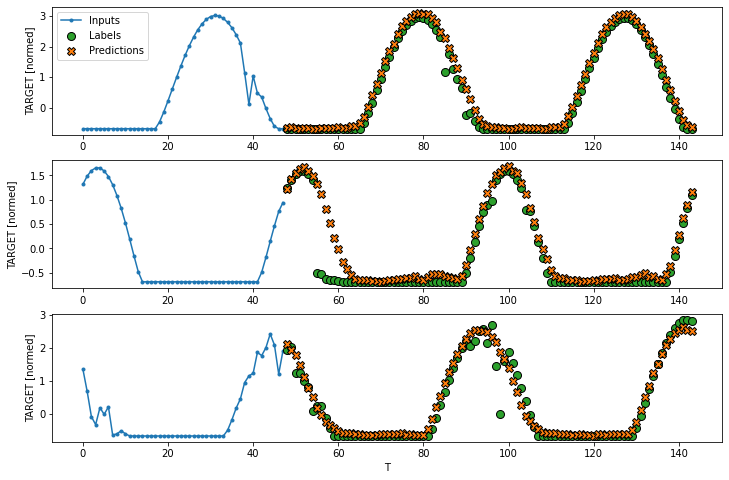

In [16]:
one_days_window_label_columns.plot(conv1)

Epoch 1/1000
1146/1146 [==============================] - 8s 6ms/step - loss: 0.1519 - mean_absolute_error: 0.3038 - mean_squared_error: 0.2822 - _pinball_loss: 0.1519 - val_loss: 0.1501 - val_mean_absolute_error: 0.3001 - val_mean_squared_error: 0.2983 - val__pinball_loss: 0.1501
Epoch 2/1000
1146/1146 [==============================] - 6s 6ms/step - loss: 0.1164 - mean_absolute_error: 0.2327 - mean_squared_error: 0.2101 - _pinball_loss: 0.1164 - val_loss: 0.1439 - val_mean_absolute_error: 0.2878 - val_mean_squared_error: 0.2879 - val__pinball_loss: 0.1439
Epoch 3/1000
1146/1146 [==============================] - 6s 6ms/step - loss: 0.1129 - mean_absolute_error: 0.2258 - mean_squared_error: 0.2065 - _pinball_loss: 0.1129 - val_loss: 0.1421 - val_mean_absolute_error: 0.2843 - val_mean_squared_error: 0.2962 - val__pinball_loss: 0.1421
Epoch 4/1000
1146/1146 [==============================] - 6s 6ms/step - loss: 0.1108 - mean_absolute_error: 0.2217 - mean_squared_error: 0.2051 - _pinball

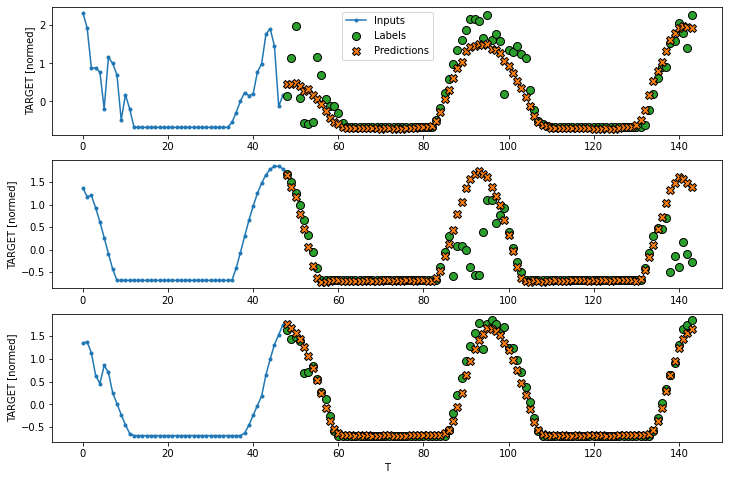

In [31]:
from src.model.multiple_output.convolution import Convolution2D3

conv2D3 = Convolution2D3(1, OUTPUT_STEPS, len(train_df.columns))
compile_and_fit_with_pinball_loss(conv2D3, one_days_window_label_columns, TAU)
conv2D3.evaluate(one_days_window_label_columns.test, verbose=0)
one_days_window_label_columns.plot(conv2D3)

In [32]:
conv2D3.evaluate(one_days_window_label_columns.test, verbose=0)

[0.07364267855882645,
 0.1472853720188141,
 0.11808878928422928,
 0.07364268600940704]

In [33]:
import importlib
import src.model.multiple_output.convolution
importlib.reload(src.model.multiple_output.convolution)


from src.model.multiple_output.convolution import Convolution2D3


window = WindowGenerator(
    train_df,
    valid_df,
    test_df,
    input_width=ONE_DAY_STEPS * 7,
    label_width=OUTPUT_STEPS,
    shift=OUTPUT_STEPS,
    label_columns=["TARGET"]
)

conv2D3 = Convolution2D3(7, OUTPUT_STEPS, len(train_df.columns))
compile_and_fit_with_pinball_loss(conv2D3, window, TAU)
conv2D3.evaluate(window.test, verbose=0)
window.plot(conv2D3)

Epoch 1/1000
1137/1137 [==============================] - 8s 6ms/step - loss: 0.1598 - mean_absolute_error: 0.3196 - mean_squared_error: 0.2882 - _pinball_loss: 0.1598 - val_loss: 0.1543 - val_mean_absolute_error: 0.3087 - val_mean_squared_error: 0.3287 - val__pinball_loss: 0.1543
Epoch 2/1000
1137/1137 [==============================] - 7s 6ms/step - loss: 0.1189 - mean_absolute_error: 0.2378 - mean_squared_error: 0.2096 - _pinball_loss: 0.1189 - val_loss: 0.1493 - val_mean_absolute_error: 0.2985 - val_mean_squared_error: 0.3442 - val__pinball_loss: 0.1493
Epoch 3/1000
1137/1137 [==============================] - 7s 6ms/step - loss: 0.1134 - mean_absolute_error: 0.2268 - mean_squared_error: 0.2026 - _pinball_loss: 0.1134 - val_loss: 0.1465 - val_mean_absolute_error: 0.2930 - val_mean_squared_error: 0.3232 - val__pinball_loss: 0.1465
Epoch 4/1000
1137/1137 [==============================] - 7s 6ms/step - loss: 0.1100 - mean_absolute_error: 0.2201 - mean_squared_error: 0.1968 - _pinball

NameError: name 'conv2D3_1' is not defined